In [2]:
import pandas as ps
import math
from random import *
import numpy as np
import matplotlib.pyplot as plot

music_df = ps.read_csv('cs654_homework2_dataset1_York.csv')

music_df_numeric_only = music_df.loc[:,"popularity":"duration (ms)"]
music_df_numeric_only

,popularity,duration (ms)
0,73,230666
1,55,149610
2,57,210826
3,71,201933
4,82,198853
...,...,...
95,45,154440
96,12,154440
97,98,154440
98,48,177613


In [3]:
def normalize_dataset(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [4]:
normalized_music_df = normalize_dataset(music_df_numeric_only)
normalized_music_df = normalize_dataset(normalized_music_df)
normalized_music_df["popularity"] = normalized_music_df["popularity"]*100
normalized_music_df["duration (ms)"] = normalized_music_df["duration (ms)"]*100
normalized_music_df["popularity"] = normalized_music_df["popularity"].apply(np.ceil)
normalized_music_df["duration (ms)"] = normalized_music_df["duration (ms)"].apply(np.ceil)
normalized_music_df["popularity"] = normalized_music_df["popularity"].astype(int)
normalized_music_df["duration (ms)"] = normalized_music_df["duration (ms)"].astype(int)
normalized_music_df.to_csv(' cs654_homework3_dataset_York.csv')

C:\Users\cy_su\PycharmProjects\CS654_Data_Mining\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\cy_su\PycharmProjects\CS654_Data_Mining\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\cy_su\PycharmProjects\CS654_Data_Mining\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axi

In [114]:
def get_X(P):
    r = []
    for x in P:
        r.append(x)
    return r
def get_Y(P):
    r = []
    for y in P:
        r.append(y)
    return r

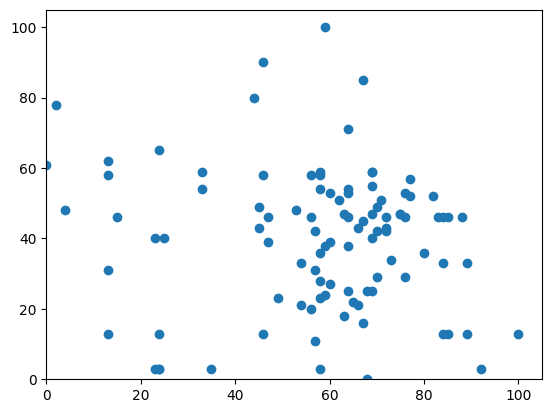

In [115]:
#They look like?
%matplotlib inline
plot.ylim([0,105])
plot.xlim([0,105])
X = get_X(normalized_music_df["popularity"])
Y = get_Y(normalized_music_df["duration (ms)"])
plot.scatter(X, Y)

In [116]:
#Assume K = 3, and the two initial centroids are selected for illustration purpose.
#Use random.randint() for random selections
centroid_1 = randint(1,100)
print(centroid_1)
centroid_2 = randint(1,100)
print(centroid_2)
centroid_3 = randint(1,100)
print(centroid_3)

83
76
34


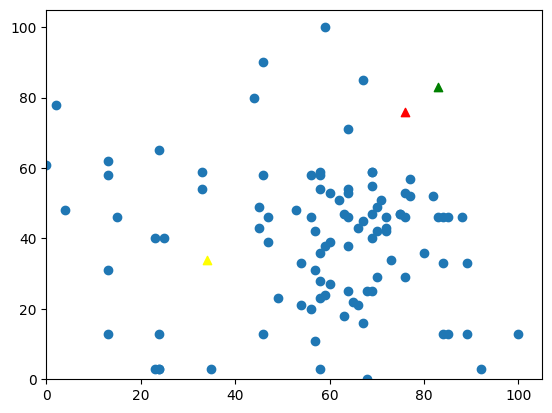

In [117]:
X = get_X(normalized_music_df["popularity"])
Y = get_Y(normalized_music_df["duration (ms)"])
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y)
X = get_X([centroid_1])
Y = get_Y([centroid_1])
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green", marker="^")
X = get_X([centroid_2])
Y = get_Y([centroid_2])
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red", marker="^")
X = get_X([centroid_3])
Y = get_Y([centroid_3])
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow", marker="^")

In [118]:
#Manhattan distance is used.
def distance(p, q):
    return int(math.fabs(p - q) + math.fabs(p-q))

In [119]:
#These will be used to store points in each cluster (index only)
cluster_1 = []
cluster_2 = []
cluster_3 = []

In [120]:
#assign points to each cluster by the distance; clustering
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1) < distance(normalized_music_df["popularity"][i], centroid_2) and distance(normalized_music_df["popularity"][i], centroid_1) < distance(normalized_music_df["popularity"][i], centroid_3):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

In [121]:
cluster_1

[4, 7, 26, 38, 45, 46, 47, 48, 90, 91, 93, 97, 99]

In [122]:
cluster_2

[0,
 1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 34,
 35,
 36,
 43,
 51,
 52,
 53,
 55,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89]

In [123]:
cluster_3

[12,
 23,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 39,
 40,
 41,
 42,
 44,
 49,
 50,
 54,
 56,
 57,
 69,
 77,
 80,
 87,
 92,
 94,
 95,
 96,
 98]

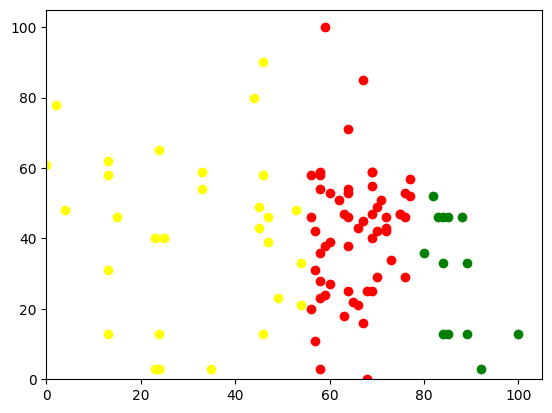

In [124]:
#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")

In [125]:
# SSE - Sum of Squared Error is used for clustering evaluation
def SSE (center, cluster):
    sum = 0
    for p in cluster:
        d = distance(center, p)
        sum = sum + d * d
    return sum

In [126]:
#SSE of cluster_1
cluster_point_x = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_1, cluster_point_x))

#SSE of cluster_2
cluster_point_x = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_2, cluster_point_x))

#SSE of cluster_3
cluster_point_x = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_3, cluster_point_x))

1952
35056
33716


In [127]:
#time to recompute the centroids
#do not forget to store the "old" centroids; will use them to terminate the algorithm
def new_centroid(p):
    sum_of_x = 0
    sum_of_y = 0
    for i in range(len(p)):
        sum_of_x = normalized_music_df["popularity"][i] + sum_of_x
    for i in range(len(p)):
        sum_of_y = normalized_music_df["duration (ms)"][i] + sum_of_y
    return int(sum_of_x/len(p)), int(sum_of_y/len(p))

In [128]:
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

In [129]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_2 == centroid_2)

False
False
False


In [132]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

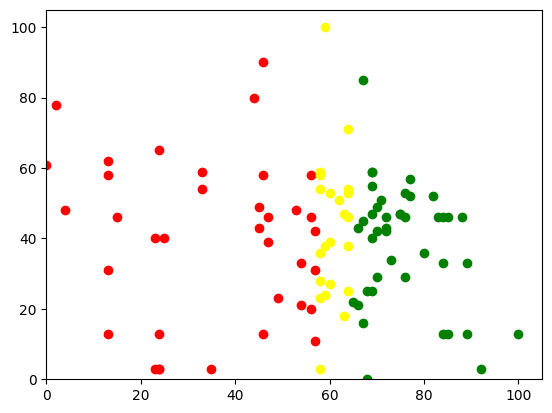

In [133]:
#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")

In [135]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

In [136]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

True
True
False


In [137]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

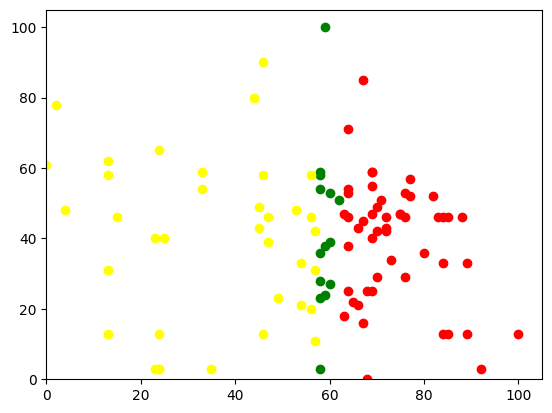

In [152]:
#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")

In [153]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

In [154]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

False
False
False


In [156]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

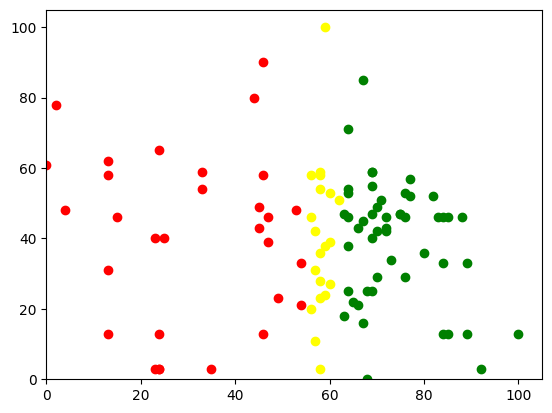

In [157]:
#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")

In [158]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

In [159]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

False
False
False


[2, 5, 9, 14, 15, 16, 35, 36, 52, 59, 65, 72, 73, 74]

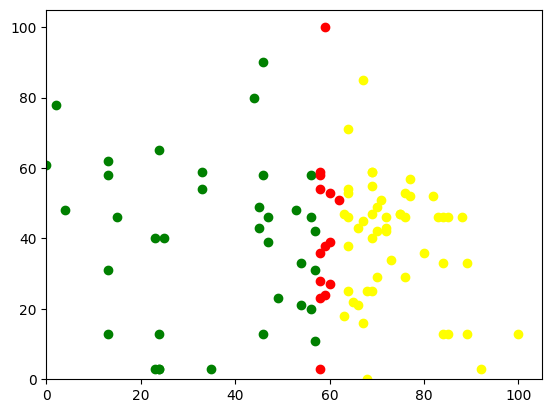

In [160]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [2]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

NameError: name 'centroid_1' is not defined

In [3]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


NameError: name 'normalized_music_df' is not defined

In [1]:
#Final SSE of cluster_1
cluster_point_x = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_1[0], cluster_point_x))

#Final SSE of cluster_2
cluster_point_x = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_2[0], cluster_point_x))

#Final SSE of cluster_3
cluster_point_x = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_3[0], cluster_point_x))

NameError: name 'cluster_1' is not defined

In [163]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

False
False
False


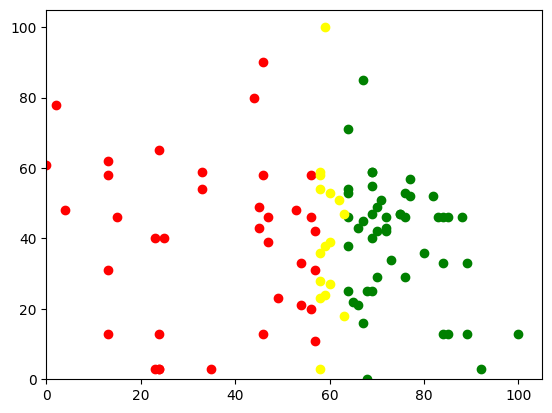

In [164]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [165]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

False
False
False


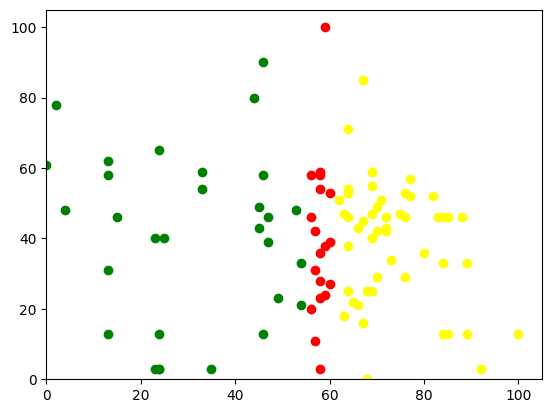

In [166]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [167]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)


False
False
False


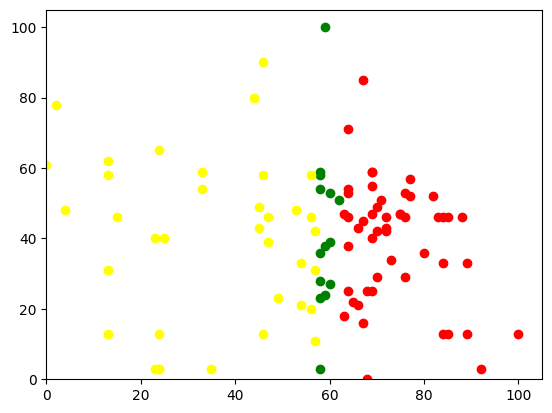

In [171]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [172]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)


False
False
False


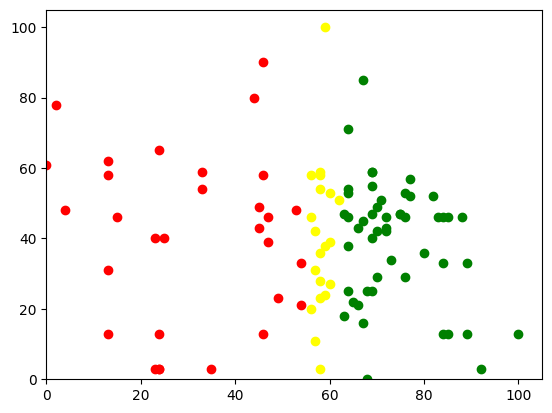

In [173]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [180]:
#Recompute the centroids
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2
old_centroid_3 = centroid_3
centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)
centroid_3 = new_centroid(cluster_3)

print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)
print(old_centroid_3 == centroid_3)

print(centroid_1)
print(centroid_2)
print(centroid_3)

True
True
True
(56, 37)
(68, 39)
(55, 40)


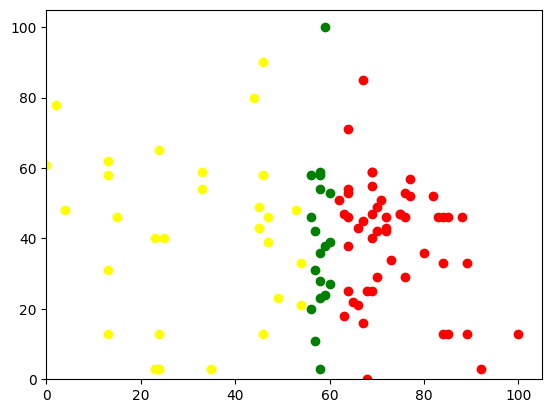

In [181]:
#Need to Repeat
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(normalized_music_df["popularity"])):
    if distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_2[0]) and distance(normalized_music_df["popularity"][i], centroid_1[0]) < distance(normalized_music_df["popularity"][i], centroid_3[0]):
        cluster_1.append(i)
    elif distance(normalized_music_df["popularity"][i], centroid_2[0]) < distance(get_X(normalized_music_df["popularity"])[i], centroid_3[0]):
        cluster_2.append(i)
    else:
        cluster_3.append(i)

#visualize clusters
cluster_point_x = []
cluster_point_y = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_point_x = []
cluster_point_y = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

cluster_point_x = []
cluster_point_y = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
    cluster_point_y.append(normalized_music_df["duration (ms)"][x])
X = get_X(cluster_point_x)
Y = get_Y(cluster_point_y)
plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="yellow")


In [182]:
cluster_1

[1, 2, 5, 9, 14, 15, 16, 17, 35, 36, 43, 59, 65, 70, 72, 73, 74, 81, 88]

In [183]:
cluster_2

[0,
 3,
 4,
 6,
 7,
 8,
 10,
 11,
 13,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 34,
 38,
 45,
 46,
 47,
 48,
 51,
 52,
 53,
 55,
 58,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 71,
 75,
 76,
 78,
 79,
 82,
 83,
 84,
 85,
 86,
 89,
 90,
 91,
 93,
 97,
 99]

In [184]:
cluster_3

[12,
 23,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 39,
 40,
 41,
 42,
 44,
 49,
 50,
 54,
 56,
 57,
 69,
 77,
 80,
 87,
 92,
 94,
 95,
 96,
 98]

In [185]:
#Final SSE of cluster_1
cluster_point_x = []
for x in cluster_1:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_1[0], cluster_point_x))

#Final SSE of cluster_2
cluster_point_x = []
for x in cluster_2:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_2[0], cluster_point_x))

#Final SSE of cluster_3
cluster_point_x = []
for x in cluster_3:
    cluster_point_x.append(normalized_music_df["popularity"][x])
print(SSE(centroid_3[0], cluster_point_x))

424
22188
103940
